In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "low_z"
key = "lambda"
quantile = "1"


In [3]:
shape_cat="mcal"
vol="all"
z_range="all_z"
key="lambda"
quantile="1"

In [4]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [5]:
if quantile!="":
    i=int(quantile)

In [6]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [7]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [8]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [9]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [10]:
NBINS=10

In [11]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [12]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [13]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [14]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [15]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [16]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  3.32it/s]

11it [00:00,  4.67it/s]

23it [00:00,  6.56it/s]

36it [00:00,  9.16it/s]

49it [00:00, 12.68it/s]

62it [00:00, 17.34it/s]

75it [00:00, 23.38it/s]

88it [00:01, 30.86it/s]

100it [00:01, 39.61it/s]

112it [00:01, 47.62it/s]

124it [00:01, 57.54it/s]

136it [00:01, 67.56it/s]

148it [00:01, 77.37it/s]

161it [00:01, 86.73it/s]

173it [00:01, 86.63it/s]

186it [00:01, 94.81it/s]

198it [00:02, 101.09it/s]

210it [00:02, 106.06it/s]

222it [00:02, 109.41it/s]

235it [00:02, 112.85it/s]

248it [00:02, 114.95it/s]

260it [00:02, 115.41it/s]

272it [00:02, 110.38it/s]

284it [00:02, 112.92it/s]

296it [00:02, 114.94it/s]

308it [00:02, 116.21it/s]

321it [00:03, 117.94it/s]

333it [00:03, 105.16it/s]

346it [00:03, 109.55it/s]

359it [00:03, 112.67it/s]

372it [00:03, 115.55it/s]

384it [00:03, 112.79it/s]

396it [00:03, 113.65it/s]

408it [00:03, 110.65it/s]

420it [00:03, 113.04it/s]

433it [00:04, 115.51it/s]

446it [00:04, 117.98it/s]

458it [00:04, 115.34it/s]

471it [00:04, 118.19it/s]

484it [00:04, 119.93it/s]

497it [00:04, 121.73it/s]

510it [00:04, 122.50it/s]

523it [00:04, 113.79it/s]

536it [00:04, 116.57it/s]

549it [00:05, 118.43it/s]

562it [00:05, 119.63it/s]

575it [00:05, 119.98it/s]

588it [00:05, 120.28it/s]

601it [00:05, 120.89it/s]

614it [00:05, 120.59it/s]

627it [00:05, 119.51it/s]

640it [00:05, 119.90it/s]

653it [00:05, 120.74it/s]

666it [00:06, 120.87it/s]

679it [00:06, 119.91it/s]

691it [00:06, 119.76it/s]

703it [00:06, 119.65it/s]

715it [00:06, 104.91it/s]

727it [00:06, 106.72it/s]

739it [00:06, 110.15it/s]

751it [00:06, 112.61it/s]

763it [00:06, 114.21it/s]

775it [00:07, 115.27it/s]

787it [00:07, 104.54it/s]

799it [00:07, 108.42it/s]

812it [00:07, 112.12it/s]

825it [00:07, 114.93it/s]

838it [00:07, 117.59it/s]

850it [00:07, 105.71it/s]

862it [00:07, 109.10it/s]

874it [00:07, 112.15it/s]

887it [00:08, 114.84it/s]

899it [00:08, 116.07it/s]

912it [00:08, 117.58it/s]

925it [00:08, 118.54it/s]

938it [00:08, 119.55it/s]

950it [00:08, 118.96it/s]

963it [00:08, 120.50it/s]

976it [00:08, 120.36it/s]

989it [00:08, 117.47it/s]

1001it [00:08, 117.13it/s]

1013it [00:09, 117.60it/s]

1026it [00:09, 118.60it/s]

1038it [00:09, 118.13it/s]

1051it [00:09, 118.73it/s]

1064it [00:09, 119.34it/s]

1076it [00:09, 118.84it/s]

1088it [00:09, 119.11it/s]

1101it [00:09, 119.28it/s]

1114it [00:09, 119.72it/s]

1126it [00:10, 119.48it/s]

1139it [00:10, 120.05it/s]

1152it [00:10, 119.69it/s]

1165it [00:10, 120.16it/s]

1178it [00:10, 115.44it/s]

1191it [00:10, 117.37it/s]

1204it [00:10, 119.03it/s]

1217it [00:10, 119.95it/s]

1230it [00:10, 119.17it/s]

1242it [00:11, 102.93it/s]

1254it [00:11, 106.75it/s]

1266it [00:11, 109.33it/s]

1278it [00:11, 110.33it/s]

1290it [00:11, 112.90it/s]

1303it [00:11, 115.09it/s]

1315it [00:11, 115.72it/s]

1327it [00:11, 112.19it/s]

1340it [00:11, 114.66it/s]

1352it [00:11, 115.01it/s]

1364it [00:12, 115.12it/s]

1376it [00:12, 115.71it/s]

1389it [00:12, 117.03it/s]

1401it [00:12, 113.31it/s]

1414it [00:12, 115.45it/s]

1426it [00:12, 116.06it/s]

1438it [00:12, 112.33it/s]

1450it [00:12, 109.72it/s]

1462it [00:12, 112.56it/s]

1474it [00:13, 114.19it/s]

1486it [00:13, 115.81it/s]

1498it [00:13, 111.76it/s]

1510it [00:13, 113.73it/s]

1523it [00:13, 116.41it/s]

1536it [00:13, 117.97it/s]

1549it [00:13, 118.66it/s]

1561it [00:13, 119.00it/s]

1573it [00:13, 117.96it/s]

1586it [00:14, 119.45it/s]

1599it [00:14, 119.69it/s]

1611it [00:14, 118.62it/s]

1624it [00:14, 119.40it/s]

1637it [00:14, 119.95it/s]

1650it [00:14, 119.02it/s]

1662it [00:14, 118.75it/s]

1674it [00:14, 100.86it/s]

1686it [00:14, 105.34it/s]

1699it [00:15, 109.89it/s]

1712it [00:15, 112.93it/s]

1724it [00:15, 113.22it/s]

1736it [00:15, 113.97it/s]

1748it [00:15, 105.65it/s]

1759it [00:15, 97.02it/s] 

1769it [00:15, 94.90it/s]

1781it [00:15, 100.89it/s]

1792it [00:15, 91.17it/s] 

1802it [00:16, 87.34it/s]

1813it [00:16, 92.66it/s]

1826it [00:16, 100.10it/s]

1839it [00:16, 105.88it/s]

1851it [00:16, 107.44it/s]

1864it [00:16, 110.82it/s]

1876it [00:16, 102.98it/s]

1889it [00:16, 108.05it/s]

1902it [00:16, 111.65it/s]

1914it [00:17, 113.83it/s]

1926it [00:17, 110.35it/s]

1938it [00:17, 112.52it/s]

1951it [00:17, 115.16it/s]

1964it [00:17, 117.06it/s]

1976it [00:17, 117.48it/s]

1988it [00:17, 111.72it/s]

2000it [00:17, 113.10it/s]

2012it [00:17, 114.22it/s]

2024it [00:18, 115.57it/s]

2036it [00:18, 116.67it/s]

2048it [00:18, 98.48it/s] 

2059it [00:18, 101.61it/s]

2071it [00:18, 106.48it/s]

2083it [00:18, 109.98it/s]

2095it [00:18, 111.61it/s]

2107it [00:18, 98.60it/s] 

2118it [00:18, 94.63it/s]

2131it [00:19, 101.12it/s]

2144it [00:19, 106.15it/s]

2157it [00:19, 109.82it/s]

2169it [00:19, 112.15it/s]

2181it [00:19, 113.97it/s]

2194it [00:19, 116.13it/s]

2206it [00:19, 116.09it/s]

2218it [00:19, 116.34it/s]

2231it [00:19, 117.57it/s]

2243it [00:20, 93.66it/s] 

2254it [00:20, 88.76it/s]

2265it [00:20, 93.30it/s]

2277it [00:20, 99.68it/s]

2289it [00:20, 104.63it/s]

2301it [00:20, 108.64it/s]

2313it [00:20, 111.48it/s]

2326it [00:20, 114.32it/s]

2339it [00:20, 116.39it/s]

2352it [00:21, 118.10it/s]

2364it [00:21, 118.41it/s]

2376it [00:21, 118.56it/s]

2389it [00:21, 118.95it/s]

2402it [00:21, 119.50it/s]

2414it [00:21, 94.70it/s] 

2425it [00:21, 90.94it/s]

2435it [00:21, 89.29it/s]

2447it [00:22, 95.84it/s]

2460it [00:22, 102.76it/s]

2472it [00:22, 106.72it/s]

2484it [00:22, 110.05it/s]

2496it [00:22, 112.64it/s]

2508it [00:22, 109.46it/s]

2520it [00:22, 111.15it/s]

2532it [00:22, 110.20it/s]

2544it [00:22, 112.82it/s]

2557it [00:22, 115.21it/s]

2569it [00:23, 116.60it/s]

2581it [00:23, 116.83it/s]

2594it [00:23, 118.28it/s]

2607it [00:23, 119.49it/s]

2620it [00:23, 119.73it/s]

2632it [00:23, 119.69it/s]

2644it [00:23, 119.63it/s]

2657it [00:23, 120.46it/s]

2670it [00:23, 119.74it/s]

2683it [00:24, 119.92it/s]

2695it [00:24, 119.27it/s]

2707it [00:24, 117.41it/s]

2719it [00:24, 118.04it/s]

2731it [00:24, 100.22it/s]

2743it [00:24, 105.36it/s]

2755it [00:24, 109.20it/s]

2768it [00:24, 112.65it/s]

2780it [00:24, 111.89it/s]

2793it [00:25, 114.77it/s]

2806it [00:25, 116.80it/s]

2819it [00:25, 118.13it/s]

2831it [00:25, 108.62it/s]

2843it [00:25, 99.75it/s] 

2856it [00:25, 105.31it/s]

2868it [00:25, 108.85it/s]

2880it [00:25, 106.49it/s]

2891it [00:26, 94.85it/s] 

2901it [00:26, 90.32it/s]

2911it [00:26, 90.91it/s]

2923it [00:26, 97.44it/s]

2936it [00:26, 103.40it/s]

2948it [00:26, 107.55it/s]

2961it [00:26, 111.24it/s]

2973it [00:26, 108.23it/s]

2985it [00:26, 110.18it/s]

2997it [00:26, 111.72it/s]

3010it [00:27, 114.54it/s]

3023it [00:27, 116.26it/s]

3036it [00:27, 117.68it/s]

3048it [00:27, 117.70it/s]

3061it [00:27, 119.11it/s]

3073it [00:27, 119.37it/s]

3086it [00:27, 120.44it/s]

3099it [00:27, 110.24it/s]

3111it [00:27, 104.13it/s]

3122it [00:28, 102.15it/s]

3133it [00:28, 95.32it/s] 

3145it [00:28, 100.33it/s]

3158it [00:28, 106.09it/s]

3170it [00:28, 109.90it/s]

3182it [00:28, 112.35it/s]

3194it [00:28, 114.04it/s]

3206it [00:28, 115.55it/s]

3218it [00:28, 116.63it/s]

3231it [00:29, 118.00it/s]

3244it [00:29, 118.77it/s]

3256it [00:29, 115.47it/s]

3268it [00:29, 116.40it/s]

3281it [00:29, 117.85it/s]

3294it [00:29, 119.23it/s]

3306it [00:29, 118.86it/s]

3319it [00:29, 119.57it/s]

3332it [00:29, 120.12it/s]

3345it [00:30, 120.52it/s]

3358it [00:30, 118.86it/s]

3370it [00:30, 118.85it/s]

3383it [00:30, 119.79it/s]

3395it [00:30, 119.21it/s]

3407it [00:30, 118.64it/s]

3419it [00:30, 118.98it/s]

3432it [00:30, 119.93it/s]

3444it [00:30, 105.95it/s]

3455it [00:31, 93.83it/s] 

3468it [00:31, 100.74it/s]

3481it [00:31, 106.55it/s]

3494it [00:31, 110.69it/s]

3507it [00:31, 113.85it/s]

3520it [00:31, 116.23it/s]

3533it [00:31, 117.96it/s]

3545it [00:31, 118.43it/s]

3558it [00:31, 119.18it/s]

3570it [00:31, 118.81it/s]

3583it [00:32, 119.80it/s]

3596it [00:32, 120.10it/s]

3609it [00:32, 114.79it/s]

3621it [00:32, 115.28it/s]

3633it [00:32, 109.87it/s]

3645it [00:32, 107.67it/s]

3658it [00:32, 111.43it/s]

3670it [00:32, 106.84it/s]

3683it [00:32, 110.64it/s]

3695it [00:33, 111.53it/s]

3707it [00:33, 113.16it/s]

3719it [00:33, 113.43it/s]

3731it [00:33, 114.76it/s]

3744it [00:33, 116.48it/s]

3757it [00:33, 117.76it/s]

3770it [00:33, 119.58it/s]

3783it [00:33, 120.62it/s]

3796it [00:33, 120.64it/s]

3809it [00:34, 117.37it/s]

3822it [00:34, 119.14it/s]

3835it [00:34, 119.93it/s]

3848it [00:34, 119.68it/s]

3861it [00:34, 120.60it/s]

3874it [00:34, 120.83it/s]

3887it [00:34, 120.91it/s]

3900it [00:34, 122.19it/s]

3913it [00:34, 122.70it/s]

3926it [00:35, 105.01it/s]

3937it [00:35, 97.32it/s] 

3948it [00:35, 90.82it/s]

3961it [00:35, 98.05it/s]

3972it [00:35, 99.92it/s]

3985it [00:35, 106.06it/s]

3998it [00:35, 110.04it/s]

4010it [00:35, 108.39it/s]

4023it [00:36, 111.74it/s]

4036it [00:36, 114.91it/s]

4048it [00:36, 115.07it/s]

4061it [00:36, 117.23it/s]

4074it [00:36, 119.45it/s]

4087it [00:36, 120.37it/s]

4100it [00:36, 120.36it/s]

4113it [00:36, 121.63it/s]

4126it [00:36, 121.00it/s]

4139it [00:36, 121.17it/s]

4152it [00:37, 121.82it/s]

4158it [00:37, 112.04it/s]


0it [00:00, ?it/s]

13it [00:00, 126.98it/s]

Number of empty sat catalogs is 2


27it [00:00, 128.09it/s]

41it [00:00, 129.04it/s]

53it [00:00, 123.92it/s]

66it [00:00, 125.24it/s]

77it [00:00, 109.36it/s]

89it [00:00, 111.85it/s]

100it [00:00, 107.81it/s]

113it [00:00, 112.71it/s]

126it [00:01, 116.28it/s]

139it [00:01, 119.37it/s]

152it [00:01, 122.09it/s]

166it [00:01, 124.86it/s]

179it [00:01, 123.50it/s]

192it [00:01, 113.38it/s]

205it [00:01, 117.63it/s]

218it [00:01, 120.97it/s]

231it [00:01, 121.81it/s]

244it [00:02, 121.76it/s]

257it [00:02, 122.70it/s]

270it [00:02, 123.90it/s]

283it [00:02, 123.78it/s]

296it [00:02, 124.07it/s]

309it [00:02, 121.55it/s]

322it [00:02, 114.08it/s]

335it [00:02, 117.05it/s]

348it [00:02, 120.11it/s]

361it [00:03, 121.04it/s]

374it [00:03, 121.34it/s]

387it [00:03, 120.80it/s]

400it [00:03, 105.59it/s]

412it [00:03, 108.33it/s]

425it [00:03, 113.60it/s]

438it [00:03, 117.76it/s]

451it [00:03, 120.83it/s]

464it [00:03, 122.47it/s]

477it [00:03, 123.79it/s]

491it [00:04, 125.56it/s]

504it [00:04, 110.11it/s]

516it [00:04, 102.71it/s]

527it [00:04, 96.70it/s] 

538it [00:04, 98.66it/s]

550it [00:04, 103.77it/s]

563it [00:04, 110.08it/s]

576it [00:04, 114.87it/s]

589it [00:05, 117.58it/s]

602it [00:05, 120.63it/s]

615it [00:05, 113.52it/s]

628it [00:05, 116.94it/s]

641it [00:05, 120.33it/s]

654it [00:05, 121.91it/s]

667it [00:05, 120.91it/s]

680it [00:05, 123.16it/s]

693it [00:05, 120.31it/s]

706it [00:06, 120.58it/s]

719it [00:06, 92.74it/s] 

732it [00:06, 101.11it/s]

745it [00:06, 107.07it/s]

758it [00:06, 112.56it/s]

771it [00:06, 116.00it/s]

784it [00:06, 102.52it/s]

795it [00:06, 93.43it/s] 

805it [00:07, 91.34it/s]

815it [00:07, 91.14it/s]

825it [00:07, 87.87it/s]

835it [00:07, 87.98it/s]

848it [00:07, 95.89it/s]

861it [00:07, 103.20it/s]

875it [00:07, 110.03it/s]

888it [00:07, 114.77it/s]

902it [00:07, 119.29it/s]

915it [00:08, 122.19it/s]

928it [00:08, 123.33it/s]

941it [00:08, 123.72it/s]

954it [00:08, 125.38it/s]

968it [00:08, 126.99it/s]

981it [00:08, 125.02it/s]

994it [00:08, 122.78it/s]

1008it [00:08, 125.35it/s]

1022it [00:08, 127.60it/s]

1036it [00:08, 128.49it/s]

1050it [00:09, 129.04it/s]

1063it [00:09, 129.02it/s]

1076it [00:09, 129.21it/s]

1089it [00:09, 129.16it/s]

1102it [00:09, 128.91it/s]

1116it [00:09, 129.33it/s]

1129it [00:09, 128.51it/s]

1143it [00:09, 129.01it/s]

1156it [00:09, 124.36it/s]

1170it [00:10, 126.20it/s]

1183it [00:10, 126.79it/s]

1196it [00:10, 127.29it/s]

1209it [00:10, 127.73it/s]

1223it [00:10, 128.87it/s]

1236it [00:10, 128.94it/s]

1249it [00:10, 129.15it/s]

1262it [00:10, 128.95it/s]

1275it [00:10, 122.60it/s]

1288it [00:10, 121.07it/s]

1301it [00:11, 108.95it/s]

1314it [00:11, 112.81it/s]

1327it [00:11, 116.53it/s]

1339it [00:11, 116.54it/s]

1353it [00:11, 120.09it/s]

1366it [00:11, 111.90it/s]

1380it [00:11, 117.19it/s]

1393it [00:11, 119.77it/s]

1407it [00:11, 123.13it/s]

1420it [00:12, 125.01it/s]

1434it [00:12, 127.00it/s]

1447it [00:12, 127.66it/s]

1461it [00:12, 128.74it/s]

1474it [00:12, 128.41it/s]

1487it [00:12, 126.53it/s]

1501it [00:12, 127.83it/s]

1515it [00:12, 129.12it/s]

1528it [00:12, 129.06it/s]

1541it [00:13, 110.82it/s]

1553it [00:13, 102.72it/s]

1564it [00:13, 97.74it/s] 

1576it [00:13, 102.13it/s]

1589it [00:13, 108.56it/s]

1602it [00:13, 113.80it/s]

1616it [00:13, 118.57it/s]

1629it [00:13, 121.78it/s]

1642it [00:13, 123.90it/s]

1655it [00:14, 125.31it/s]

1669it [00:14, 126.91it/s]

1682it [00:14, 101.41it/s]

1694it [00:14, 101.99it/s]

1708it [00:14, 109.42it/s]

1721it [00:14, 114.58it/s]

1735it [00:14, 118.99it/s]

1749it [00:14, 122.15it/s]

1762it [00:14, 124.32it/s]

1775it [00:15, 125.75it/s]

1788it [00:15, 125.13it/s]

1801it [00:15, 125.98it/s]

1814it [00:15, 125.08it/s]

1827it [00:15, 126.03it/s]

1840it [00:15, 126.26it/s]

1853it [00:15, 125.15it/s]

1866it [00:15, 125.77it/s]

1879it [00:15, 121.05it/s]

1892it [00:16, 123.23it/s]

1905it [00:16, 123.96it/s]

1918it [00:16, 123.70it/s]

1932it [00:16, 125.58it/s]

1945it [00:16, 126.77it/s]

1958it [00:16, 102.08it/s]

1969it [00:16, 97.67it/s] 

1980it [00:16, 93.11it/s]

1991it [00:16, 95.97it/s]

2003it [00:17, 99.93it/s]

2016it [00:17, 106.88it/s]

2029it [00:17, 112.36it/s]

2042it [00:17, 116.46it/s]

2055it [00:17, 119.82it/s]

2068it [00:17, 122.68it/s]

2081it [00:17, 124.30it/s]

2095it [00:17, 126.94it/s]

2108it [00:17, 122.81it/s]

2122it [00:18, 126.05it/s]

2135it [00:18, 123.03it/s]

2148it [00:18, 124.72it/s]

2161it [00:18, 125.87it/s]

2175it [00:18, 127.41it/s]

2189it [00:18, 128.86it/s]

2202it [00:18, 128.64it/s]

2216it [00:18, 129.66it/s]

2230it [00:18, 130.25it/s]

2244it [00:18, 130.00it/s]

2258it [00:19, 130.65it/s]

2272it [00:19, 130.06it/s]

2286it [00:19, 129.30it/s]

2300it [00:19, 129.69it/s]

2313it [00:19, 115.16it/s]

2325it [00:19, 113.01it/s]

2338it [00:19, 116.43it/s]

2351it [00:19, 119.48it/s]

2364it [00:20, 107.93it/s]

2376it [00:20, 101.37it/s]

2389it [00:20, 107.13it/s]

2402it [00:20, 112.13it/s]

2415it [00:20, 116.45it/s]

2428it [00:20, 119.29it/s]

2441it [00:20, 122.17it/s]

2454it [00:20, 122.25it/s]

2467it [00:20, 124.11it/s]

2480it [00:20, 118.16it/s]

2494it [00:21, 121.55it/s]

2507it [00:21, 123.39it/s]

2521it [00:21, 125.28it/s]

2535it [00:21, 127.04it/s]

2548it [00:21, 127.46it/s]

2561it [00:21, 126.16it/s]

2574it [00:21, 122.15it/s]

2587it [00:21, 122.45it/s]

2600it [00:21, 112.28it/s]

2612it [00:22, 102.84it/s]

2623it [00:22, 95.74it/s] 

2635it [00:22, 101.33it/s]

2649it [00:22, 108.73it/s]

2662it [00:22, 112.83it/s]

2675it [00:22, 115.80it/s]

2688it [00:22, 115.18it/s]

2701it [00:22, 119.00it/s]

2715it [00:23, 122.51it/s]

2728it [00:23, 124.48it/s]

2742it [00:23, 126.53it/s]

2756it [00:23, 127.51it/s]

2769it [00:23, 122.38it/s]

2783it [00:23, 125.01it/s]

2797it [00:23, 126.52it/s]

2811it [00:23, 127.86it/s]

2824it [00:23, 128.16it/s]

2837it [00:23, 128.62it/s]

2851it [00:24, 129.48it/s]

2864it [00:24, 125.21it/s]

2878it [00:24, 127.25it/s]

2892it [00:24, 128.92it/s]

2905it [00:24, 128.89it/s]

2918it [00:24, 126.68it/s]

2931it [00:24, 121.98it/s]

2944it [00:24, 122.71it/s]

2957it [00:24, 124.59it/s]

2970it [00:25, 120.77it/s]

2983it [00:25, 122.64it/s]

2996it [00:25, 123.12it/s]

3009it [00:25, 124.56it/s]

3023it [00:25, 125.95it/s]

3036it [00:25, 126.01it/s]

3050it [00:25, 127.04it/s]

3063it [00:25, 125.11it/s]

3076it [00:25, 109.01it/s]

3088it [00:26, 110.48it/s]

3101it [00:26, 114.66it/s]

3114it [00:26, 117.23it/s]

3126it [00:26, 106.16it/s]

3138it [00:26, 109.74it/s]

3151it [00:26, 115.09it/s]

3165it [00:26, 119.46it/s]

3178it [00:26, 122.12it/s]

3191it [00:26, 123.84it/s]

3204it [00:26, 125.29it/s]

3217it [00:27, 125.45it/s]

3230it [00:27, 124.10it/s]

3243it [00:27, 120.05it/s]

3256it [00:27, 122.71it/s]

3269it [00:27, 123.75it/s]

3282it [00:27, 108.20it/s]

3295it [00:27, 112.24it/s]

3308it [00:27, 116.74it/s]

3321it [00:27, 120.29it/s]

3335it [00:28, 123.10it/s]

3348it [00:28, 125.06it/s]

3361it [00:28, 126.05it/s]

3375it [00:28, 127.62it/s]

3388it [00:28, 127.75it/s]

3401it [00:28, 127.34it/s]

3414it [00:28, 127.44it/s]

3427it [00:28, 127.30it/s]

3441it [00:28, 128.14it/s]

3454it [00:29, 128.31it/s]

3467it [00:29, 110.13it/s]

3479it [00:29, 101.87it/s]

3490it [00:29, 96.82it/s] 

3501it [00:29, 97.19it/s]

3515it [00:29, 105.98it/s]

3529it [00:29, 112.51it/s]

3543it [00:29, 118.08it/s]

3557it [00:29, 121.70it/s]

3570it [00:30, 108.39it/s]

3582it [00:30, 108.97it/s]

3594it [00:30, 108.60it/s]

3608it [00:30, 114.86it/s]

3622it [00:30, 118.97it/s]

3635it [00:30, 121.16it/s]

3648it [00:30, 122.95it/s]

3661it [00:30, 123.71it/s]

3674it [00:30, 124.52it/s]

3687it [00:31, 117.41it/s]

3700it [00:31, 119.60it/s]

3713it [00:31, 120.90it/s]

3726it [00:31, 121.18it/s]

3739it [00:31, 122.11it/s]

3752it [00:31, 123.85it/s]

3766it [00:31, 125.98it/s]

3779it [00:31, 126.33it/s]

3793it [00:31, 128.15it/s]

3806it [00:32, 127.59it/s]

3819it [00:32, 126.83it/s]

3832it [00:32, 125.28it/s]

3845it [00:32, 125.20it/s]

3858it [00:32, 124.24it/s]

3871it [00:32, 122.48it/s]

3884it [00:32, 123.27it/s]

3898it [00:32, 125.53it/s]

3911it [00:32, 126.10it/s]

3924it [00:33, 108.66it/s]

3937it [00:33, 112.66it/s]

3951it [00:33, 117.92it/s]

3964it [00:33, 118.08it/s]

3977it [00:33, 114.44it/s]

3990it [00:33, 118.15it/s]

4003it [00:33, 120.71it/s]

4016it [00:33, 122.23it/s]

4029it [00:33, 116.74it/s]

4043it [00:34, 120.58it/s]

4056it [00:34, 123.01it/s]

4069it [00:34, 124.53it/s]

4082it [00:34, 126.09it/s]

4096it [00:34, 127.62it/s]

4110it [00:34, 128.94it/s]

4124it [00:34, 128.01it/s]

4137it [00:34, 127.08it/s]

4151it [00:34, 128.20it/s]

4158it [00:34, 119.14it/s]

Number of empty sat catalogs is 2


In [17]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [18]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [19]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [20]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [21]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [22]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [23]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [24]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [25]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

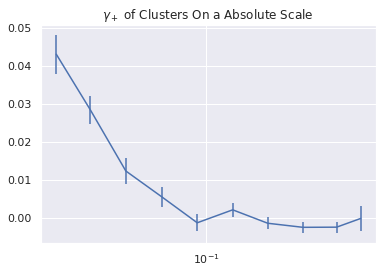

Aggregated xi:
[-21.7531 -30.1585 -19.9945 -14.8264   5.5317 -14.7462  14.2525  32.3391
  28.4561   0.2693]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -2184.938   -4104.5337  -5482.1475  -7775.8824 -10446.6981 -13459.7294
 -14821.425  -12922.3774  -6241.5773   -377.9867]
------------------------------------------------------------------------------
Aggregated npairs:
[  505.  1062.  1619.  2683.  4317.  6937. 10112. 13052. 11666.  1806.]
------------------------------------------------------------------------------
Mean xi:
[-0.0431 -0.0284 -0.0123 -0.0055  0.0013 -0.0021  0.0014  0.0025  0.0024
  0.0001]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3266 -3.8649 -3.3861 -2.8982 -2.4199 -1.9403 -1.4657 -0.9901 -0.535
 -0.2093]
------------------------------------------------------------------------------


In [26]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

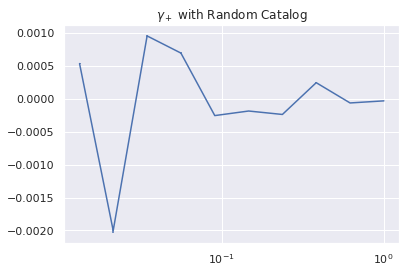

[ 5.3807e-04 -2.0032e-03  9.5860e-04  6.9755e-04 -2.5362e-04 -1.8407e-04
 -2.3639e-04  2.4706e-04 -6.1347e-05 -2.9438e-05]
[-8.3444e-06  3.1065e-05 -1.4866e-05 -1.0818e-05  3.9331e-06  2.8546e-06
  3.6659e-06 -3.8315e-06  9.5137e-07  4.5652e-07]


In [27]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

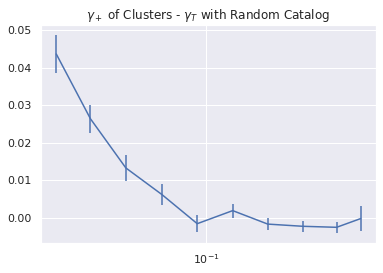

In [28]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

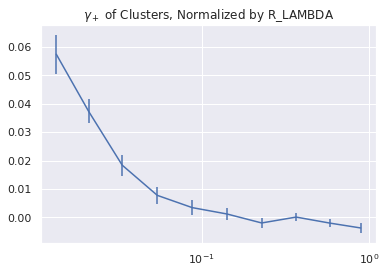

Aggregated xi:
[-14.6488 -27.5392 -23.4326 -15.2592 -11.2576  -6.4217  15.9906  -1.4087
  26.6903  30.4809]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1096.0165  -2840.6128  -4321.8326  -5717.7893  -7927.4485 -10300.2628
 -12124.0768 -11383.7815  -7131.4875   -954.4097]
------------------------------------------------------------------------------
Aggregated npairs:
[  255.   737.  1274.  1965.  3262.  5272.  8214. 11352. 13294.  8221.]
------------------------------------------------------------------------------
Mean xi:
[-0.0574 -0.0374 -0.0184 -0.0078 -0.0035 -0.0012  0.0019 -0.0001  0.002
  0.0037]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.2981 -3.8543 -3.3923 -2.9098 -2.4302 -1.9538 -1.476  -1.0028 -0.5364
 -0.1161]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [29]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)